In [1]:
from hossam import load_data
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
import seaborn as sb

In [2]:
my_dpi=200
font_path='../NotoSansKR-Regular.ttf'
fm.fontManager.addfont(font_path)
font_prop=fm.FontProperties(fname=font_path)
font_name=font_prop.get_name()
plt.rcParams['font.family']=font_name
plt.rcParams['font.size']=6
plt.rcParams['axes.unicode_minus']=False

In [3]:
origin=load_data('penguins')
origin.head()

[data] https://data.hossam.kr/data/lab06/penguins.xlsx
[desc] 남극 팔머 군도의 펭귄 3종에 대해 신체 치수와 서식지 정보(출처: seaborn 내장 데이터)

field              description
-----------------  -------------
species            팽귄 종
island             서식지
bill_length_mm     부리 길이
bill_depth_mm      부리 두께
flipper_length_mm  날개 길이
body_mass_g        몸무게
sex                성별



,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181,3750,MALE
1,Adelie,Torgersen,39.5,17.4,186,3800,FEMALE
2,Adelie,Torgersen,40.3,18.0,195,3250,FEMALE
3,Adelie,Torgersen,36.7,19.3,193,3450,FEMALE
4,Adelie,Torgersen,39.3,20.6,190,3650,MALE


In [4]:
df=origin.astype({'species':'category','island':'category','sex':'category'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   species            334 non-null    category
 1   island             334 non-null    category
 2   bill_length_mm     334 non-null    float64 
 3   bill_depth_mm      334 non-null    float64 
 4   flipper_length_mm  334 non-null    int64   
 5   body_mass_g        334 non-null    int64   
 6   sex                333 non-null    category
dtypes: category(3), float64(2), int64(2)
memory usage: 11.9 KB


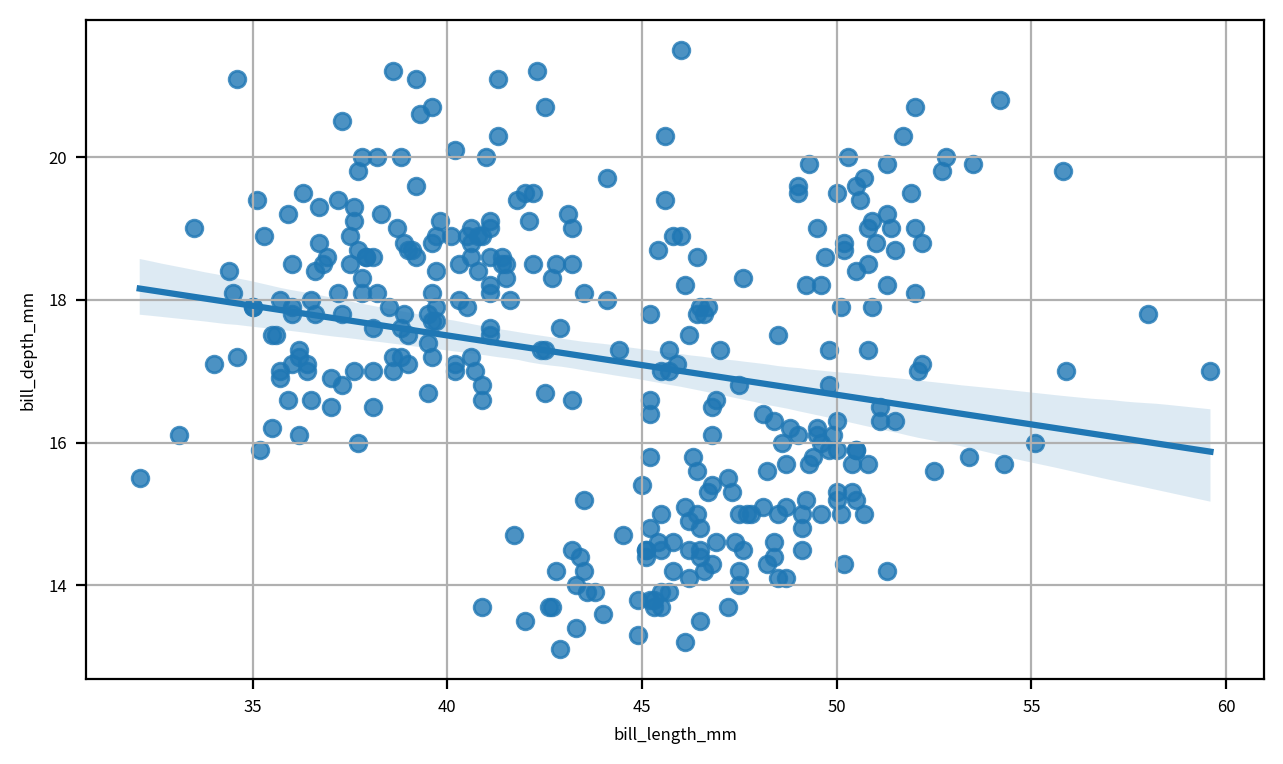

In [5]:
# 1. 그래프 초기화
width_px=1280
height_px=760
rows=1
cols=1
figsize=(width_px/my_dpi, height_px/my_dpi)
fig, ax=plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2. 그래프 그리기
sb.regplot(data=origin, x='bill_length_mm', y='bill_depth_mm')

# 3. 그래프 꾸미기
ax.grid(True)

# 4. 출력
plt.tight_layout()
# plt.savefig('myplot.png',dpi=my_dpi)
plt.show()
plt.close()

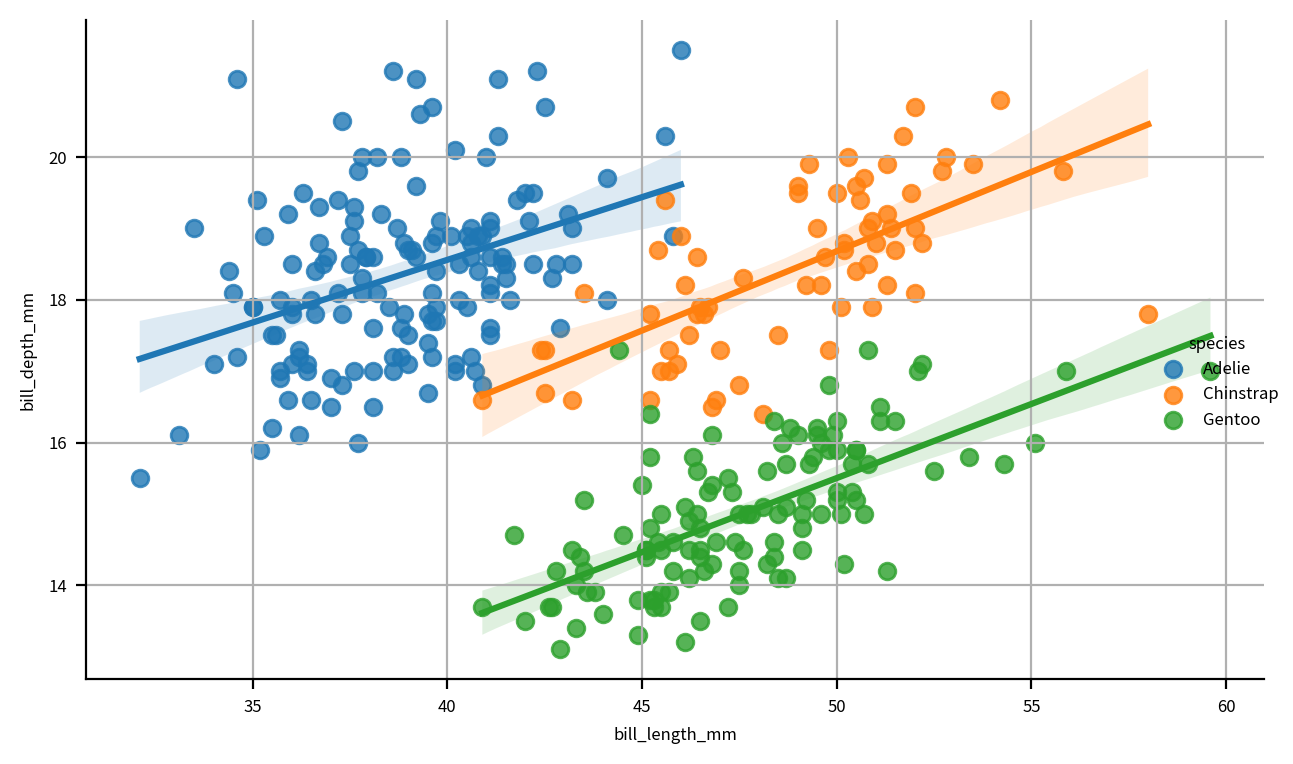

In [8]:
# 1. 그래프 초기화
width_px=1280
height_px=760
figsize=(width_px/my_dpi, height_px/my_dpi)

# 2. 그래프 그리기
g=sb.lmplot(data=origin, x='bill_length_mm', y='bill_depth_mm', hue='species')
g.fig.set_dpi(my_dpi)
g.fig.set_figwidth(figsize[0])
g.fig.set_figheight(figsize[1])
plt.grid()

# 4. 출력
plt.tight_layout()
# plt.savefig('myplot.png',dpi=my_dpi)
plt.show()
plt.close()

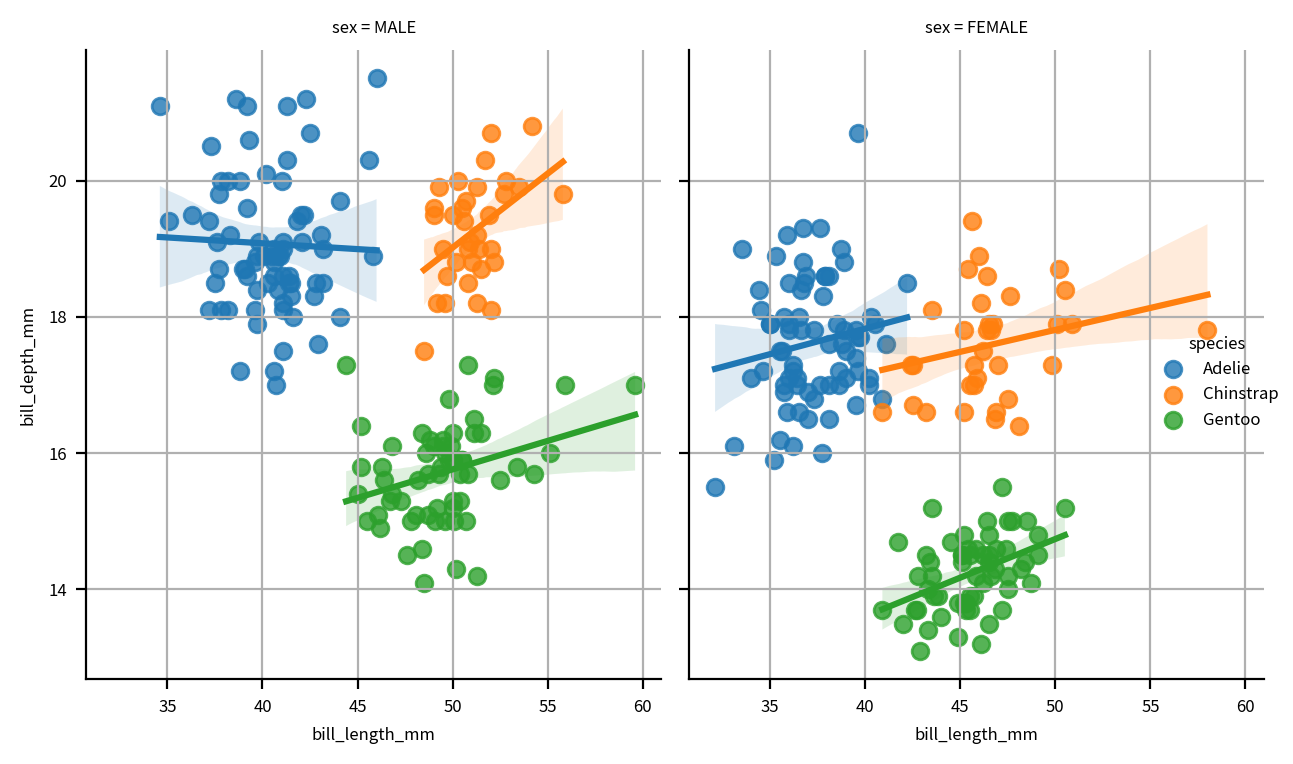

In [9]:
# 1. 그래프 초기화
width_px=1280
height_px=760
figsize=(width_px/my_dpi, height_px/my_dpi)

# 2. 그래프 그리기
g=sb.lmplot(data=origin, x='bill_length_mm', y='bill_depth_mm', hue='species', col='sex')
g.fig.set_dpi(my_dpi)
g.fig.set_figwidth(figsize[0])
g.fig.set_figheight(figsize[1])

for ax in g.axes.flatten():
    ax.grid(True)

# 4. 출력
plt.tight_layout()
# plt.savefig('myplot.png',dpi=my_dpi)
plt.show()
plt.close()

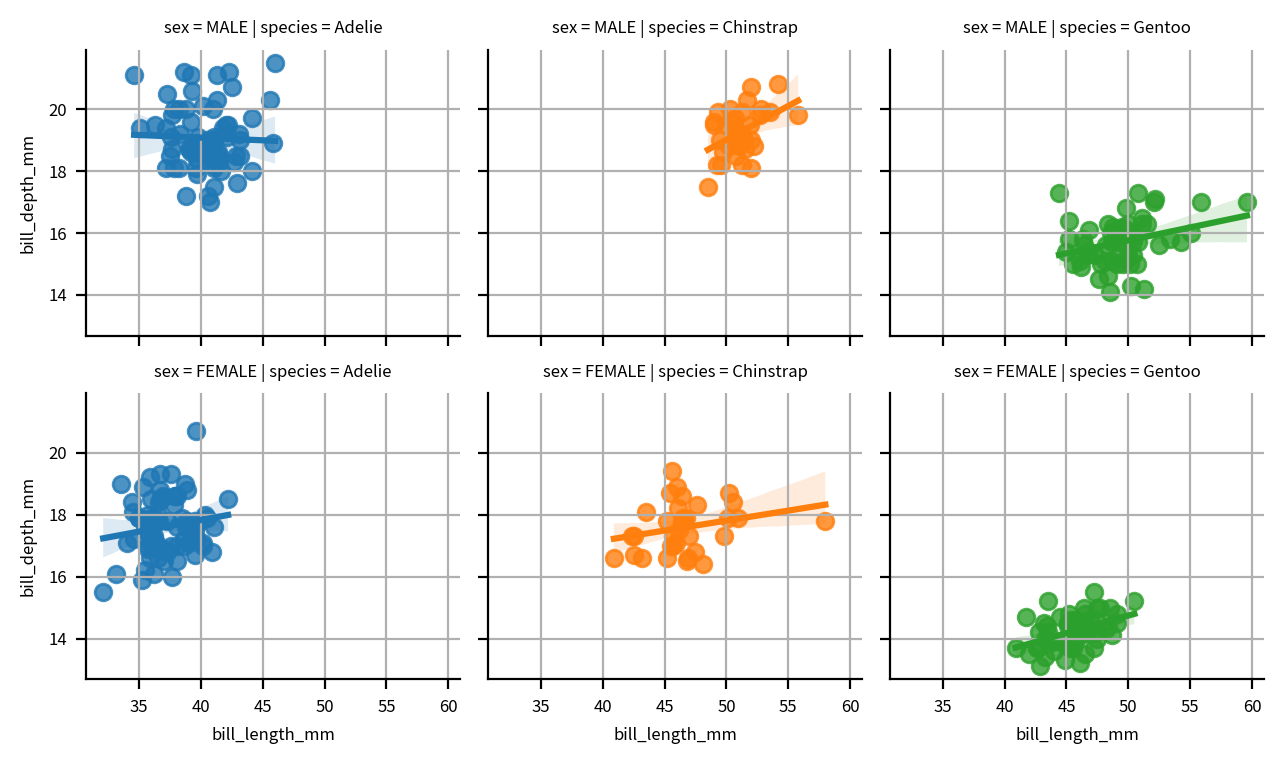

In [10]:
# 1. 그래프 초기화
width_px=1280
height_px=760
figsize=(width_px/my_dpi, height_px/my_dpi)

# 2. 그래프 그리기
g=sb.lmplot(data=origin, x='bill_length_mm', y='bill_depth_mm', hue='species', col='species', row='sex')
g.fig.set_dpi(my_dpi)
g.fig.set_figwidth(figsize[0])
g.fig.set_figheight(figsize[1])

for ax in g.axes.flatten():
    ax.grid(True)

# 4. 출력
plt.tight_layout()
# plt.savefig('myplot.png',dpi=my_dpi)
plt.show()
plt.close()

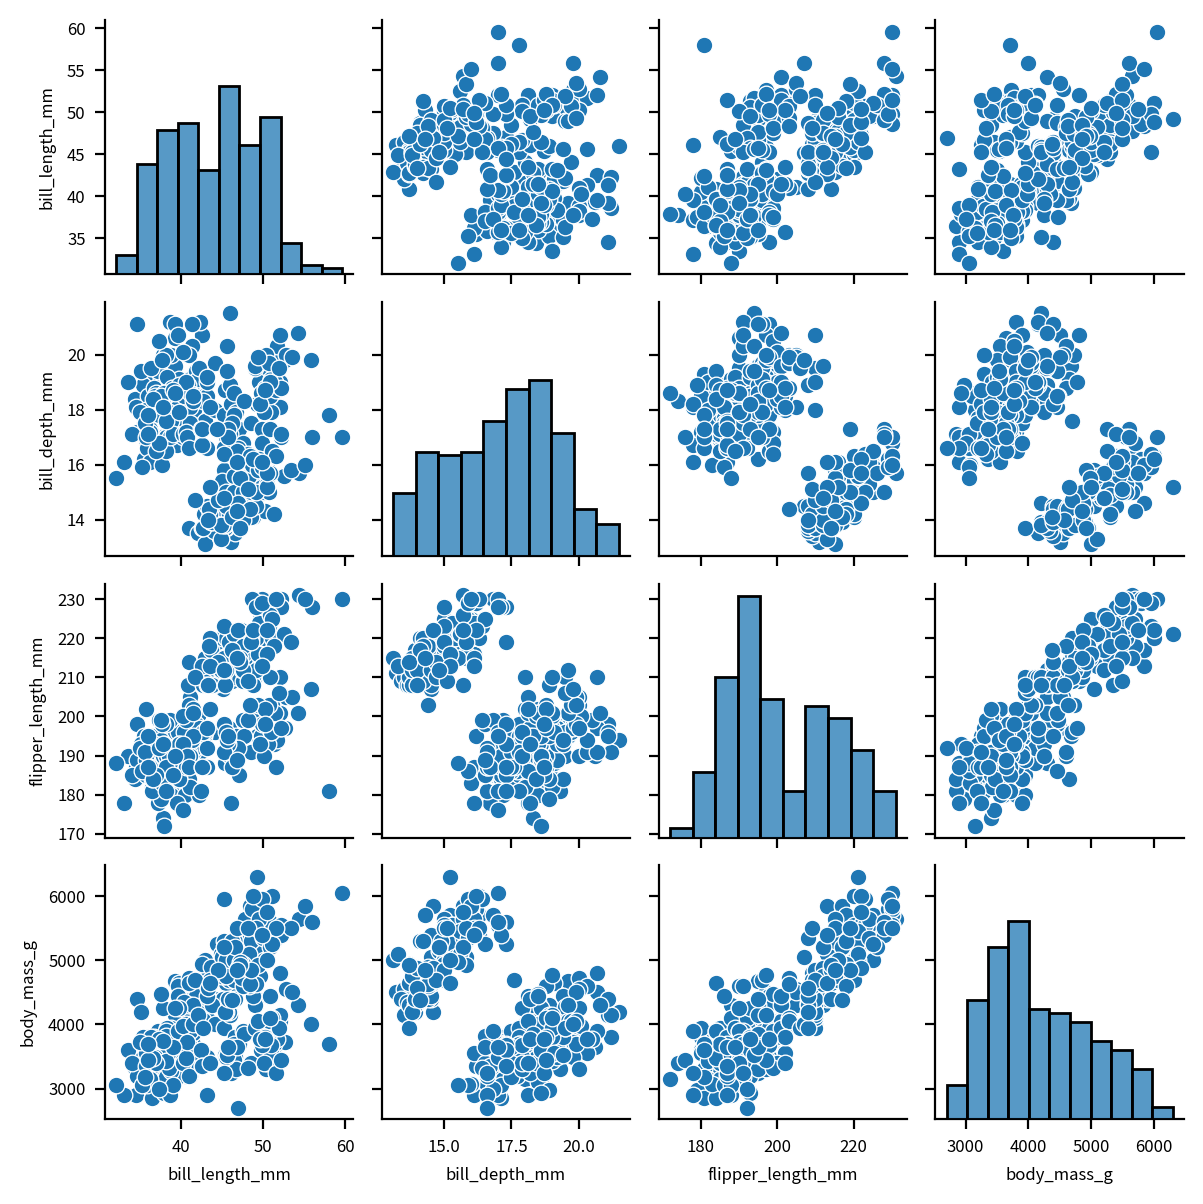

In [11]:
# 1. 그래프 초기화
width_px=1200
height_px=1200
figsize=(width_px/my_dpi, height_px/my_dpi)

# 2. 그래프 그리기
g=sb.pairplot(df)
g.fig.set_dpi(my_dpi)
g.fig.set_figwidth(figsize[0])
g.fig.set_figheight(figsize[1])


# 4. 출력
plt.tight_layout()
# plt.savefig('myplot.png',dpi=my_dpi)
plt.show()
plt.close()

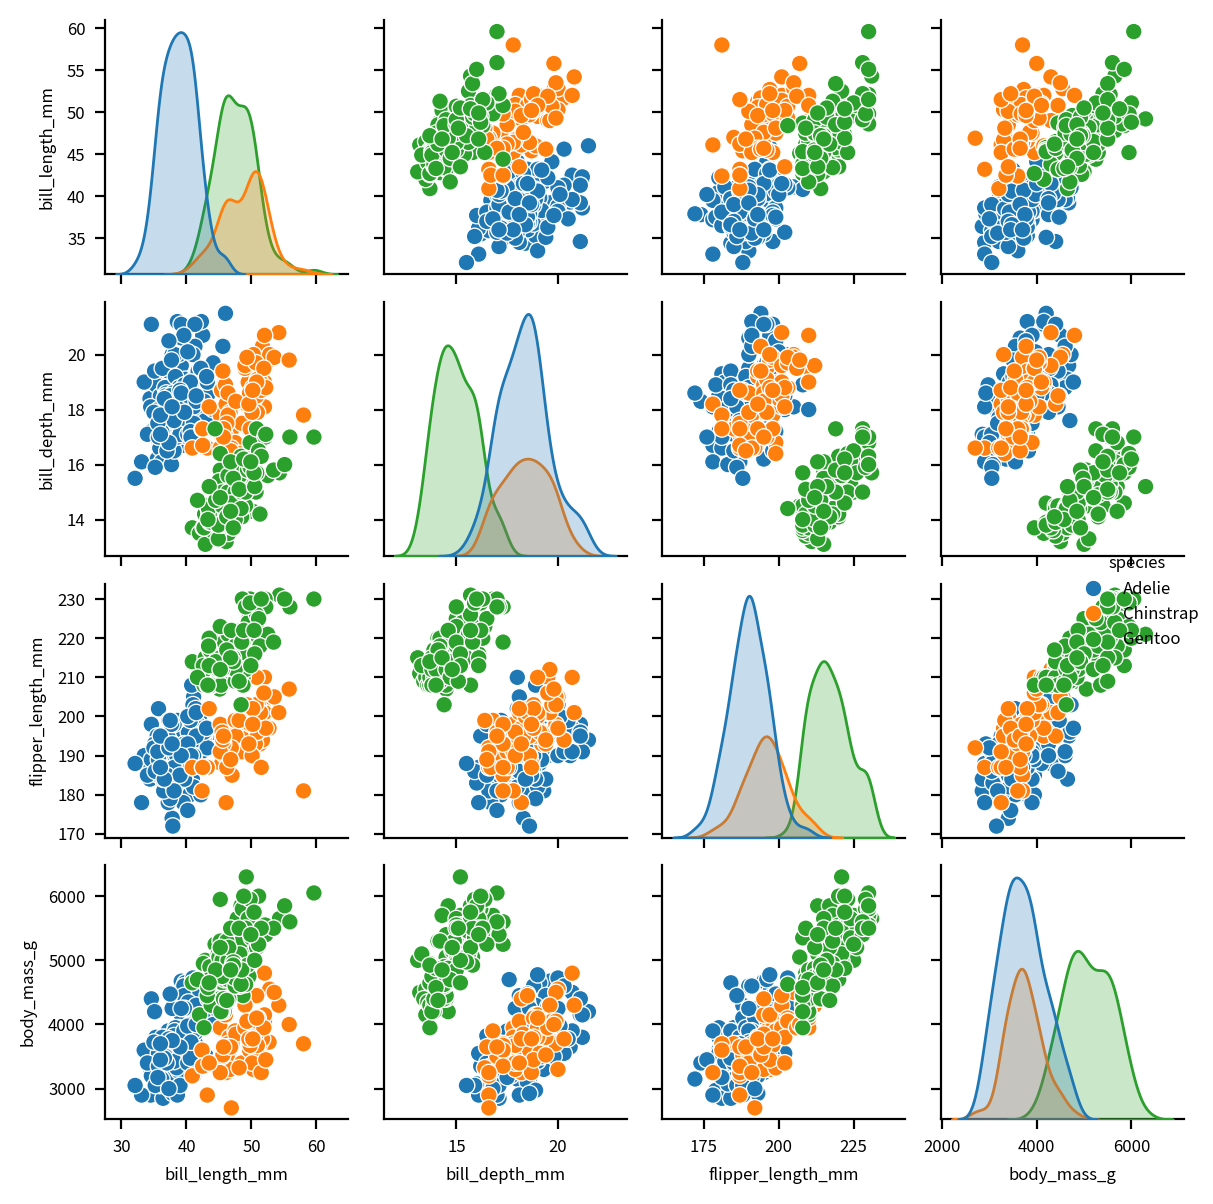

In [12]:
# 1. 그래프 초기화
width_px=1200
height_px=1200
figsize=(width_px/my_dpi, height_px/my_dpi)

# 2. 그래프 그리기
g=sb.pairplot(data=df, hue='species', diag_kind='kde')
g.fig.set_dpi(my_dpi)
g.fig.set_figwidth(figsize[0])
g.fig.set_figheight(figsize[1])


# 4. 출력
plt.tight_layout()
# plt.savefig('myplot.png',dpi=my_dpi)
plt.show()
plt.close()

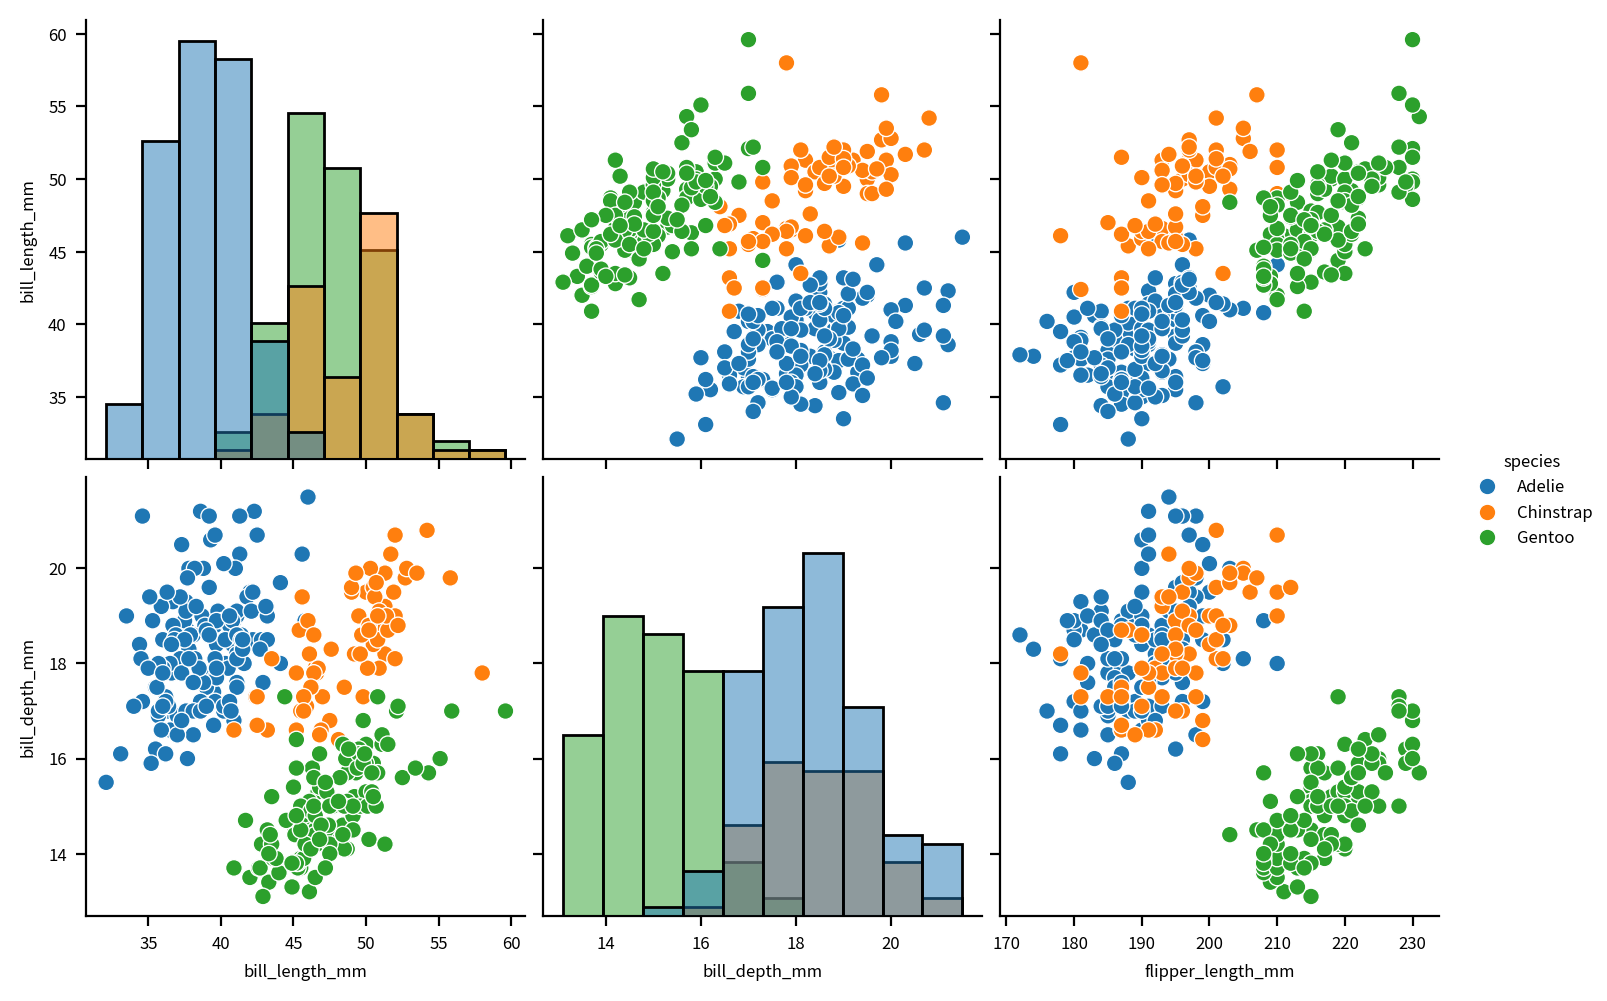

In [14]:
# 1. 그래프 초기화
width_px=1600
height_px=1000
figsize=(width_px/my_dpi, height_px/my_dpi)

# 2. 그래프 그리기
g=sb.pairplot(data=df, hue='species', diag_kind='hist',
              x_vars=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm'],
              y_vars=['bill_length_mm', 'bill_depth_mm'])
g.fig.set_dpi(my_dpi)
g.fig.set_figwidth(figsize[0])
g.fig.set_figheight(figsize[1])


# 4. 출력
plt.grid()
# plt.savefig('myplot.png',dpi=my_dpi)
plt.show()
plt.close()

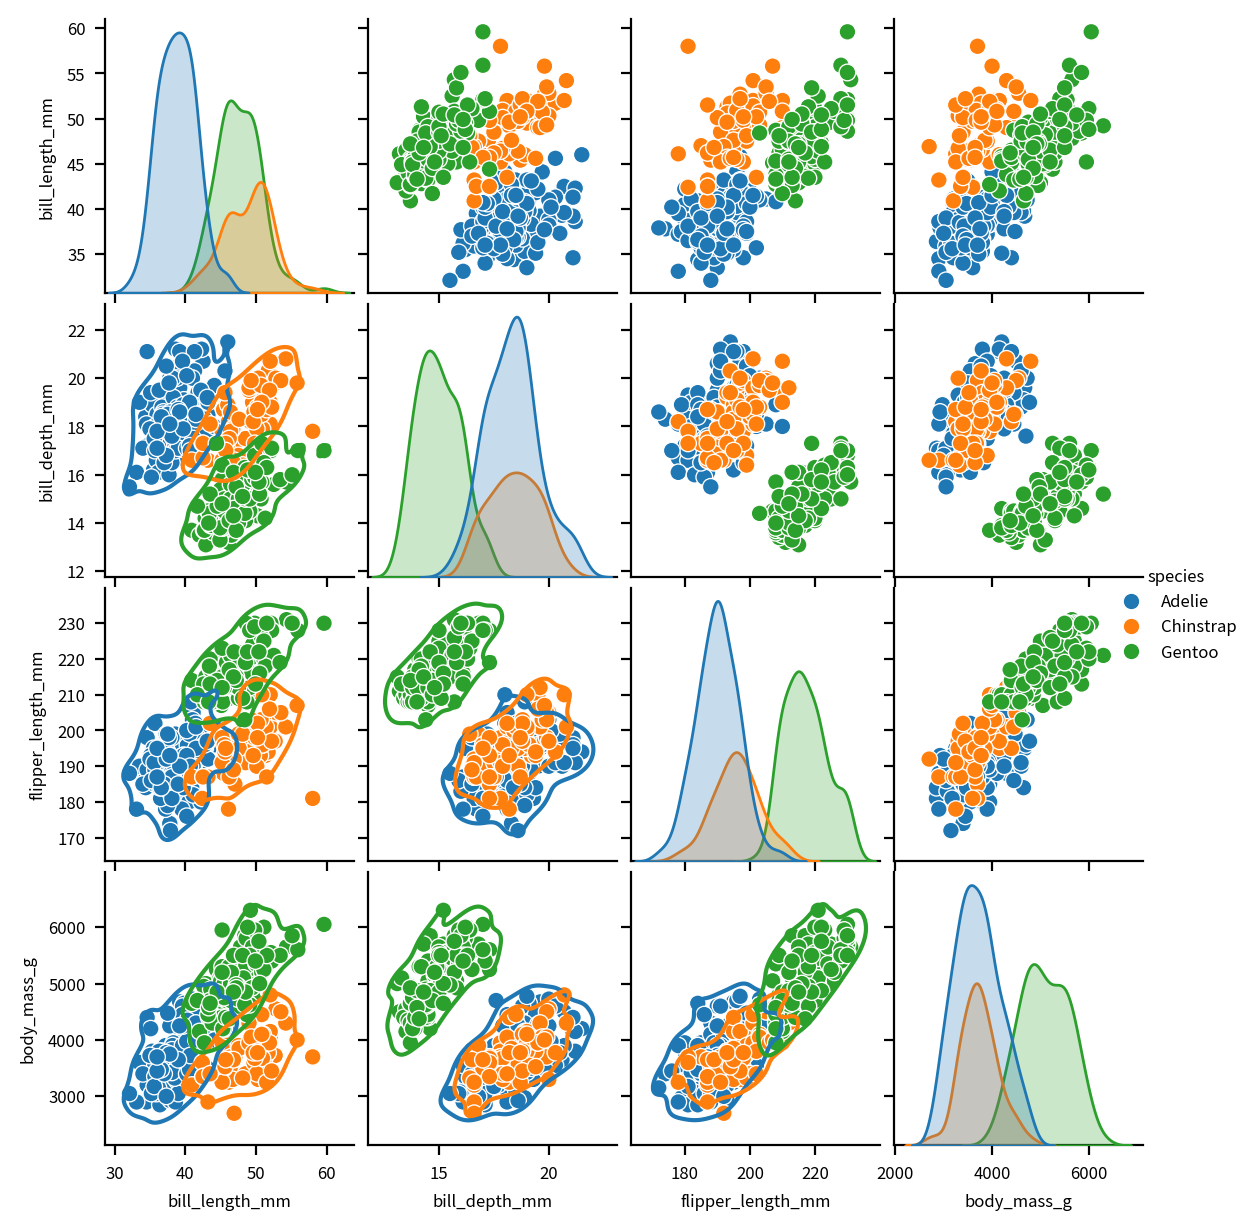

In [15]:
# 1. 그래프 초기화
width_px=1200
height_px=1200
figsize=(width_px/my_dpi, height_px/my_dpi)

# 2. 그래프 그리기
g=sb.pairplot(data=df, hue='species')
g.map_lower(sb.kdeplot, levels=1, color=0.2)
g.fig.set_dpi(my_dpi)
g.fig.set_figwidth(figsize[0])
g.fig.set_figheight(figsize[1])


# 4. 출력
plt.grid()
# plt.savefig('myplot.png',dpi=my_dpi)
plt.show()
plt.close()